<a href="https://colab.research.google.com/github/Fayis-PV/100_ML_Projects/blob/main/Disease_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
train_file = '/content/drive/MyDrive/Colab Notebooks/datasets/disease_prediction/Training.csv'
df = pd.read_csv(train_file).dropna(axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


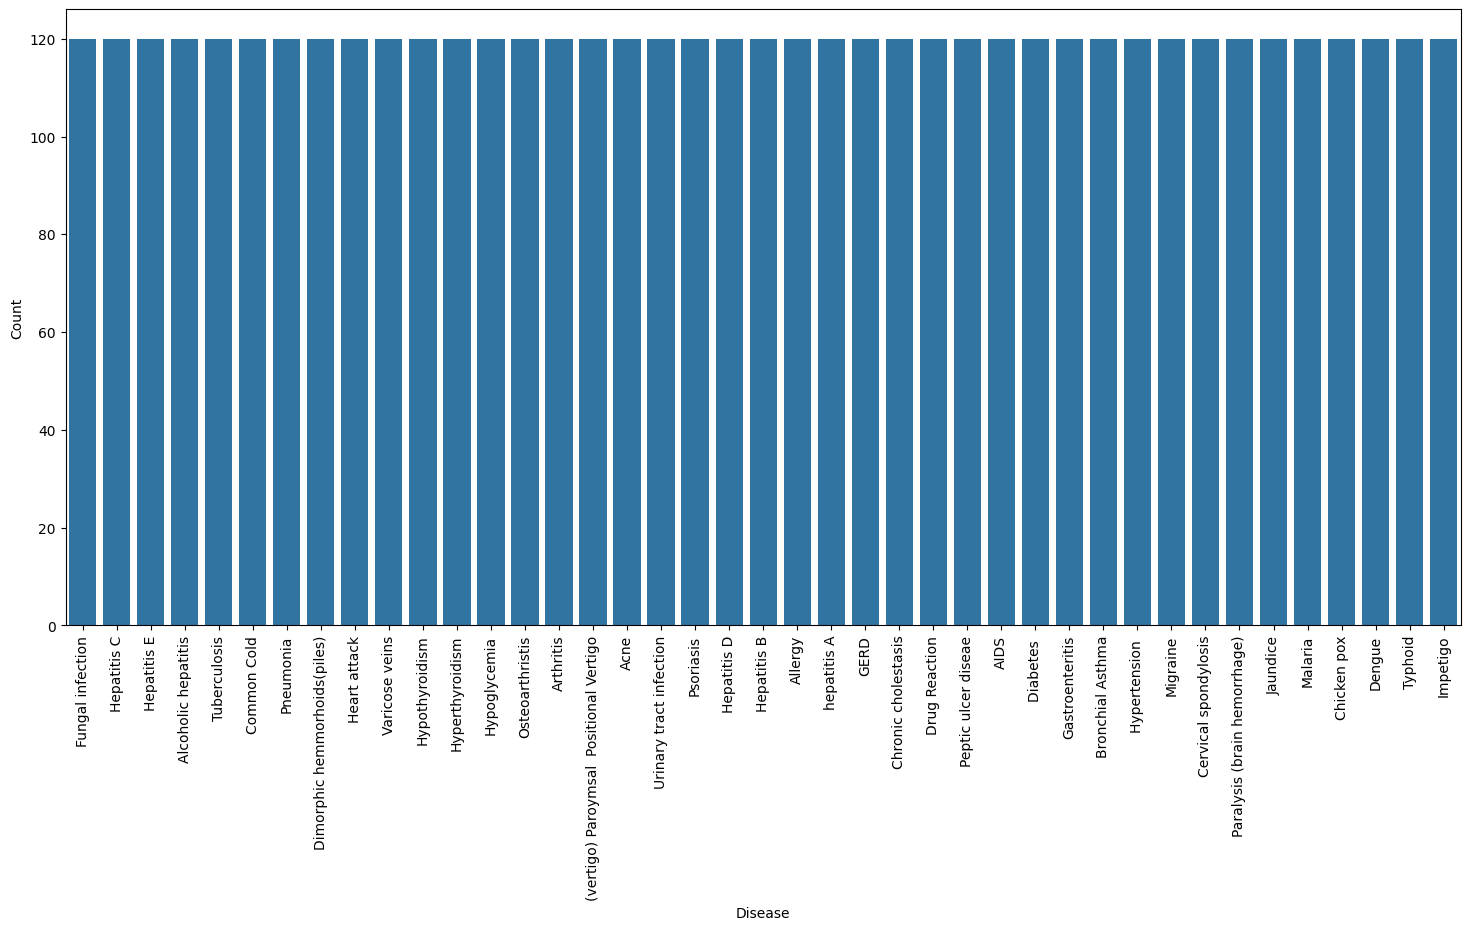

In [ ]:
prognosis_index = df['prognosis'].value_counts()
prognosis_df = pd.DataFrame({
    'Disease': prognosis_index.index,
    'Count': prognosis_index.values
})

plt.figure(figsize=(18, 8))
sns.barplot(x='Disease', y='Count', data= prognosis_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

Splitting Data

In [ ]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3936, 132), (984, 132), (3936,), (984,))

K-Fold Score Validation

In [ ]:
def get_score(model, X, y):
  return accuracy_score(y, model.predict(X))

Model Fitting for SVM

In [ ]:
model = SVC()
score = cross_val_score(model, X, y, cv=15, scoring= get_score, n_jobs=-1)
score.mean()

1.0

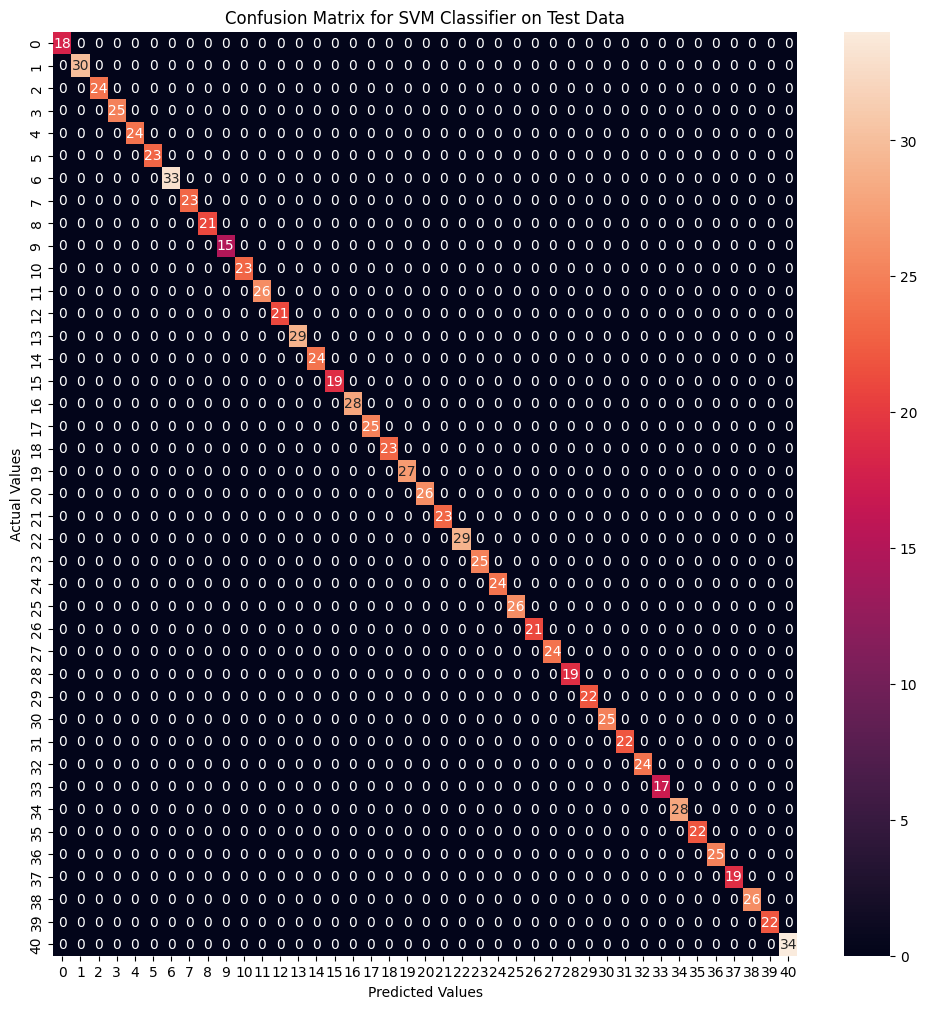

In [ ]:
svc_model = model.fit(X_train, y_train)
pred = svc_model.predict(X_test)
score = accuracy_score(y_test, pred)

cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Model Fitting with GaussianNB of Naive Bayes

In [ ]:
model = GaussianNB()
score = cross_val_score(model, X, y, cv=15, scoring= get_score)
score.mean()

1.0

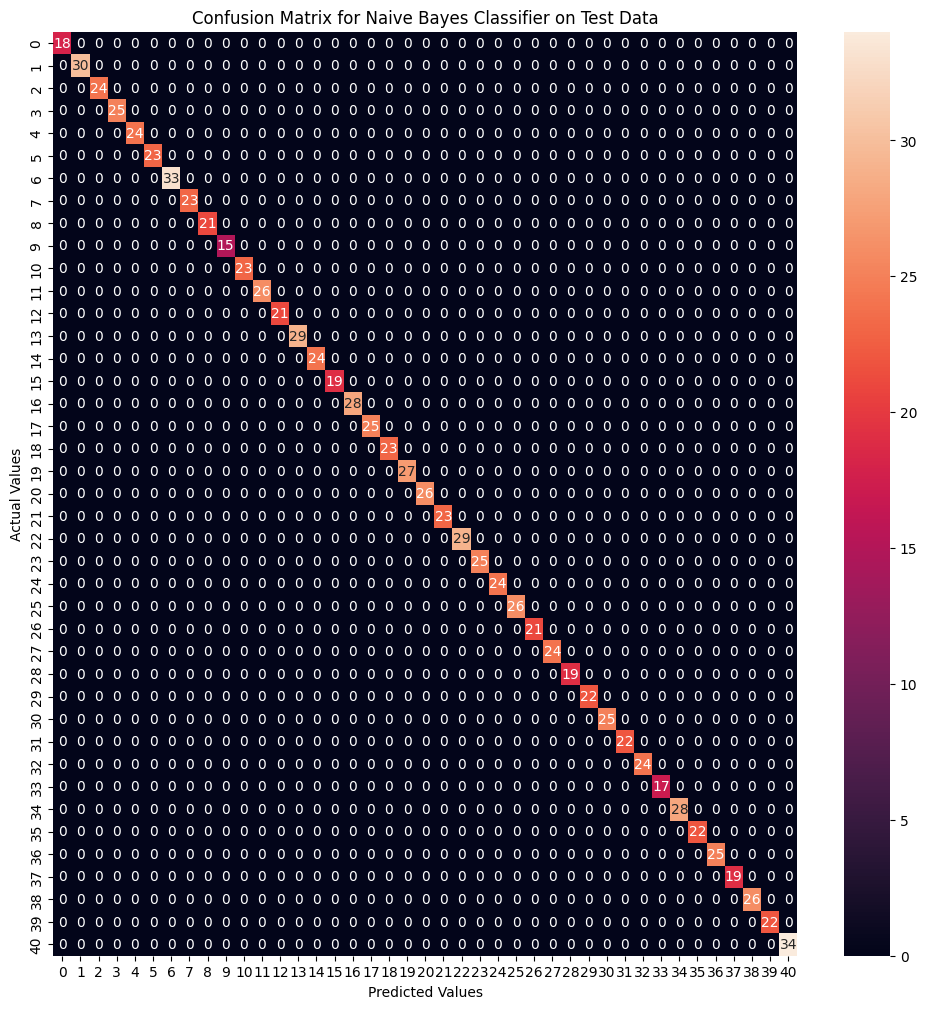

In [ ]:
nb_model = model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
score = accuracy_score(y_test, pred)

cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Model Fitting with Random Forest

In [ ]:
model = RandomForestClassifier()
score = cross_val_score(model, X, y, cv=10, scoring= get_score)
score.mean()

1.0

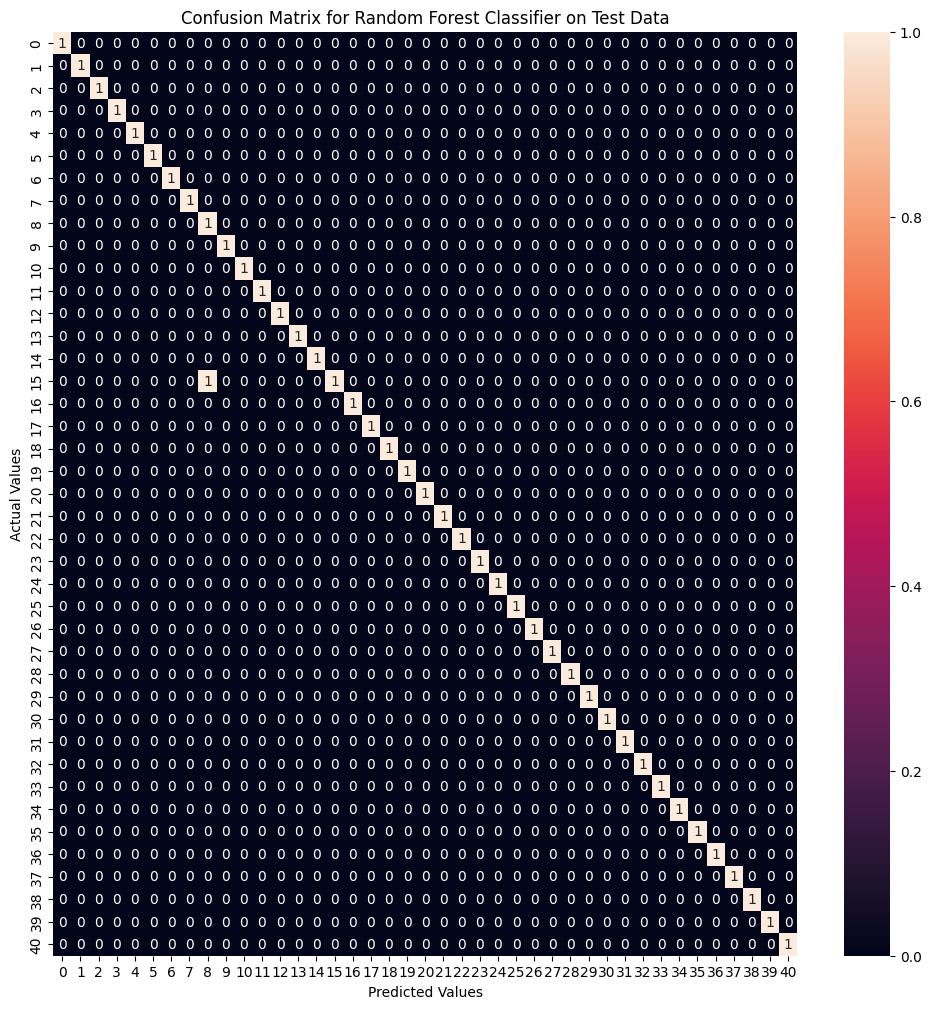

In [ ]:
rf_model = model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = accuracy_score(y_test, pred)

cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [ ]:
model = KNeighborsClassifier()
score = cross_val_score(model, X, y, cv=15, scoring= get_score)
score.mean()

1.0

In [ ]:
model = DecisionTreeClassifier()
score = cross_val_score(model, X, y, cv=15, scoring= get_score)
score.mean()

1.0

In [ ]:
model = LogisticRegression()
score = cross_val_score(model, X, y, cv=15, scoring= get_score)
score.mean()

1.0

Testing the models

In [ ]:
test_file = '/content/drive/MyDrive/Colab Notebooks/datasets/disease_prediction/Testing.csv'
test_df = pd.read_csv(test_file).dropna(axis=1)
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


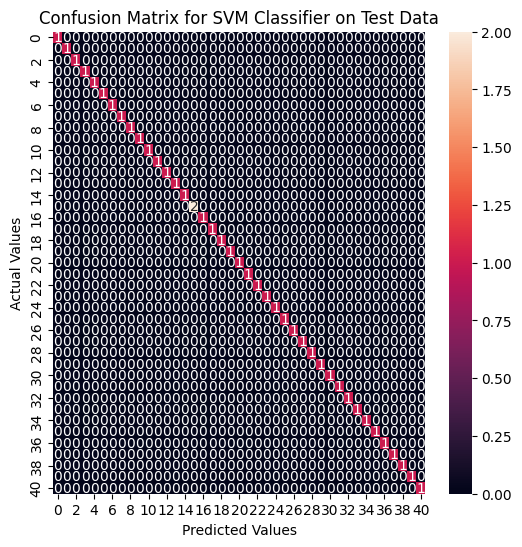

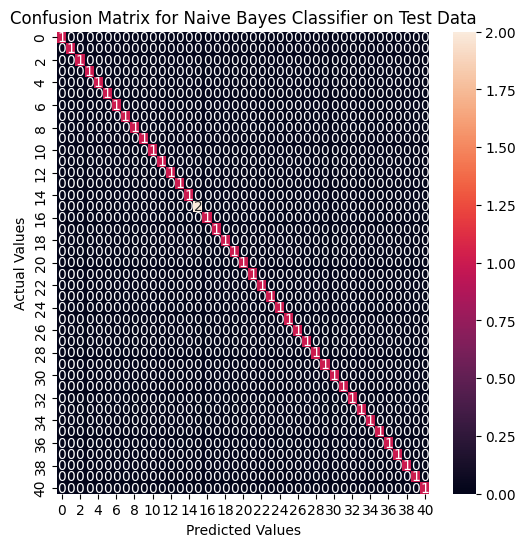

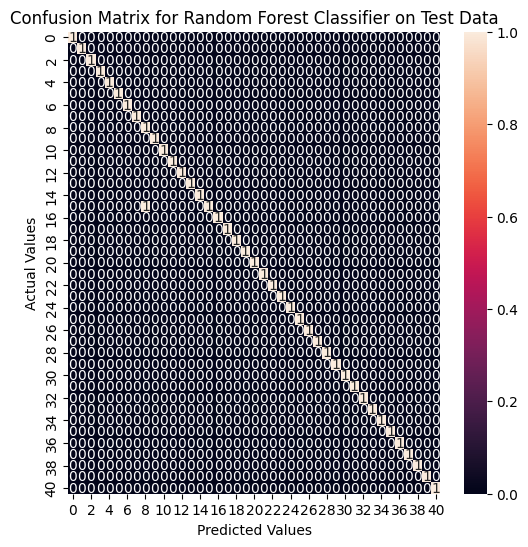

In [ ]:
X_test = test_df.drop('prognosis', axis=1)
y_test = encoder.transform(test_df['prognosis'])

svc_pred = svc_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

svm_score = accuracy_score(y_test, svc_pred)
nb_score = accuracy_score(y_test, nb_pred)
rf_score = accuracy_score(y_test, rf_pred)
score = [score for score in [svm_score, nb_score, rf_score]]
score_mean = np.mean(score)

conf_matrix = [confusion_matrix(y_test, prediction) for prediction in [svc_pred, nb_pred, rf_pred]]
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix[0], annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix[1], annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix[2], annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


Predict a new disease with Symptoms

In [ ]:
symptoms = X.columns.values

symptom_indices = {}
for index, symptom in enumerate(symptoms):
  symptom = (' ').join([i.capitalize() for i in symptom.split('_')])
  symptom_indices[symptom] = index

def define_symptoms(symptoms):
  symptoms = symptoms.split(',')

  symptom_index = [0] * len(symptom_indices.values())
  for symptom in symptoms:
    index = symptom_indices[symptom]
    symptom_index[index] = 1

  symptom_index = np.array(symptom_index)
  symptom_index = symptom_index.reshape(1, -1)

  svc_prediction = svc_model.predict(symptom_index)
  svc_prediction = encoder.inverse_transform(svc_prediction)[0]
  print(svc_prediction)
  rf_prediction = rf_model.predict(symptom_index)
  rf_prediction = encoder.inverse_transform(rf_prediction)[0]
  print(rf_prediction)
  nb_prediction = nb_model.predict(symptom_index)
  nb_prediction = encoder.inverse_transform(nb_prediction)[0]
  print(nb_prediction)


Weight Loss,Red Sore Around Nose,Irritability
Impetigo
Impetigo
Impetigo


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
diseases = np.random.choice(list(symptom_indices.keys()), 3)
diseases = ','.join(diseases)
print(diseases)
define_symptoms(diseases)


Chest Pain,Stiff Neck,Sinus Pressure
Heart attack
Heart attack
Heart attack


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
